In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42  # no type-3
matplotlib.rcParams['ps.fonttype'] = 42

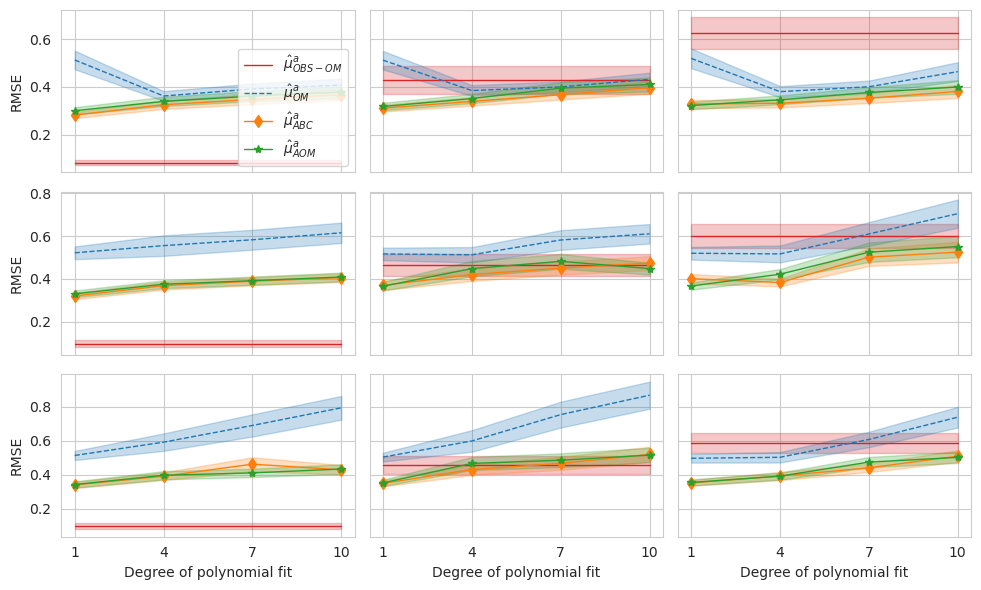

In [54]:
gp_settings = [[0,2,3],[4,6,7],[8,10,11]]
gp_settings = [[0,1,2],[3,4,5],[6,7,8]]

poly_degs = [1,4,7,10]
methods = ["fax","gax","bax","hax"]
plot_sigma = 4
fb_alpha = 0.25
lw = 1
cp = sns.color_palette("tab10")
cp_ind = {"fax": 3, "gax": 0, "bax": 1, "hax": 2}
labels = {"fax": r"$\hat{\mu}^a_{OBS-OM}$", "gax": r"$\hat{\mu}^a_{OM}$", "bax": r"$\hat{\mu}^a_{ABC}$", "hax": r"$\hat{\mu}^a_{AOM}}$"}
markers = {"fax": " ", "gax": " ", "bax": "d", "hax": "*"}
line_styles = {"fax": "-", "gax": "--", "bax": "-", "hax": "-"}
fill_styles = {"fax": "full", "gax": "full", "bax": "full", "hax": "full"}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,6),sharex='col', sharey='row')
sns.set_style("whitegrid")

for i in range(3):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"results_nrct200_rbf/gp_setting_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)
        for k, pdeg in enumerate(poly_degs):
            df_res.loc[k, "Method"] = f"fax-PD-{k}"

        for met in methods:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_rmse = met_df["RMSE"]
            std_rmse = met_df["Std.Dev."]
            lb = mean_rmse - plot_sigma * std_rmse
            ub = mean_rmse + plot_sigma * std_rmse
            axes[i, j].plot(poly_degs, mean_rmse, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha)
            axes[i, j].set_xticks(poly_degs)
            #axes[i, j].set_yticks(minor=True)
            if i == 2: axes[i,j].set_xlabel("Degree of polynomial fit")
            if j == 0: axes[i,j].set_ylabel("RMSE")

axes[0,0].legend(loc='lower right')
# t = axes[2,1].text(5.5, -.5, "Direction",
#             ha="center", va="center", rotation=0, size=15,
#             bbox=dict(boxstyle="rarrow,pad=0.3",
#                       fc="lightblue", ec="steelblue", lw=1))
plt.tight_layout()
plt.savefig("res.svg", bbox_inches="tight")


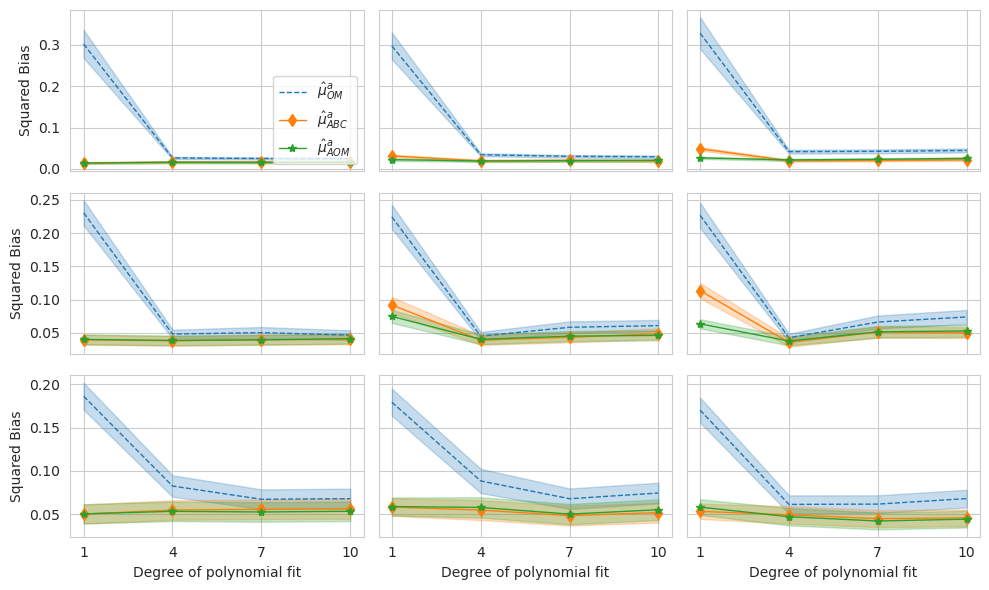

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,6),sharex='col', sharey='row')
sns.set_style("whitegrid")

for i in range(3):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"results_nrct200/gp_setting_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)
        for k, pdeg in enumerate(poly_degs):
            df_res.loc[k, "Method"] = f"fax-PD-{k}"

        for met in ["gax","bax","hax"]:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_bias = met_df["Squared-Bias"]
            std_bias = met_df["Std.Dev..1"]
            lb = mean_bias - plot_sigma * std_bias
            ub = mean_bias + plot_sigma * std_bias
            axes[i, j].plot(poly_degs, mean_bias, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha)
            axes[i, j].set_xticks(poly_degs)
            #axes[i, j].set_yticks(minor=True)
            if i == 2: axes[i,j].set_xlabel("Degree of polynomial fit")
            if j == 0: axes[i,j].set_ylabel("Squared Bias")

axes[0,0].legend(loc='lower right')
# t = axes[2,1].text(5.5, -.5, "Direction",
#             ha="center", va="center", rotation=0, size=15,
#             bbox=dict(boxstyle="rarrow,pad=0.3",
#                       fc="lightblue", ec="steelblue", lw=1))
plt.tight_layout()
plt.savefig("res.svg", bbox_inches="tight")


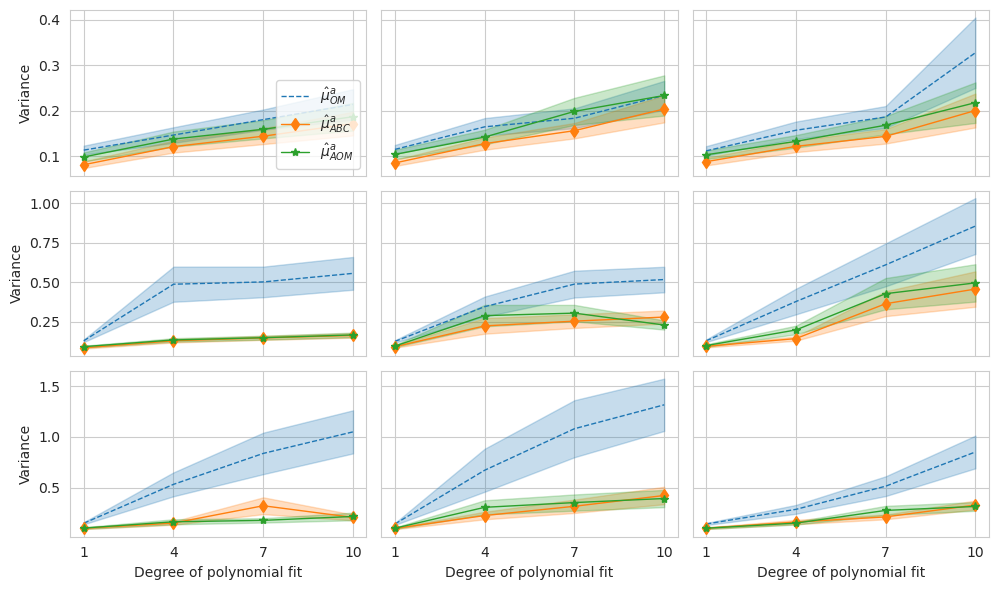

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,6),sharex='col', sharey='row')
sns.set_style("whitegrid")

for i in range(3):
    for j in range(3):
        gps = gp_settings[i][j]
        df_res = pd.read_csv(f"results_nrct200/gp_setting_{gps}/res_wstd.csv").rename(columns={"Unnamed: 0":"Method"})

        df_res = pd.concat([pd.concat([df_res.iloc[0:1]] * 3, ignore_index=True), df_res], ignore_index=True)
        for k, pdeg in enumerate(poly_degs):
            df_res.loc[k, "Method"] = f"fax-PD-{k}"

        for met in ["gax","bax","hax"]:
            met_df = df_res[df_res["Method"].str.contains(met)]
            mean_var = met_df["Variance"]
            std_var = met_df["Std.Dev..2"]
            lb = mean_var - plot_sigma * std_var
            ub = mean_var + plot_sigma * std_var
            axes[i, j].plot(poly_degs, mean_var, color=cp[cp_ind[met]], linewidth=lw, linestyle=line_styles[met], marker=markers[met], fillstyle=fill_styles[met], label=labels[met])
            axes[i, j].fill_between(poly_degs, lb, ub, color=cp[cp_ind[met]], alpha=fb_alpha)
            axes[i, j].set_xticks(poly_degs)
            #axes[i, j].set_yticks(minor=True)
            if i == 2: axes[i,j].set_xlabel("Degree of polynomial fit")
            if j == 0: axes[i,j].set_ylabel("Variance")

axes[0,0].legend(loc='lower right')
# t = axes[2,1].text(5.5, -.5, "Direction",
#             ha="center", va="center", rotation=0, size=15,
#             bbox=dict(boxstyle="rarrow,pad=0.3",
#                       fc="lightblue", ec="steelblue", lw=1))
plt.tight_layout()
plt.savefig("res.svg", bbox_inches="tight")
